# Pretrained Model, classification, Elastic Net

In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/Innolab/Github') 

Mounted at /content/drive


In [2]:
from src.preprocessing.preprocessing_matlab_files import preprocess_mat_files
from src.preprocessing.data_preparation import prepare_data

In [3]:
matlab_dir = "/content/drive/MyDrive/Colab Notebooks/Innolab/Matlab Files" # Enter the directory for the matlab files
excel_path = "/content/drive/MyDrive/Colab Notebooks/Innolab/DELCODE_dataset.xlsx" # Enter the directory for the corresponding excel sheet
write_dir = "/content/drive/MyDrive/Colab Notebooks/Innolab/write" # ...
export_file = False # rename to export file
preprocessing_type = 'conn' 

df = preprocess_mat_files(matlab_dir = matlab_dir, excel_path = excel_path, write_dir = write_dir,
                           export_file = export_file, preprocessing_type = 'conn')

loading files
Starting Preprocessing
Creating Final Dataset
Done!


In [4]:
df

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,1,0a8d02f2b,11,66,17.08.2016,0,2,17,0.054016,0.0,1.0,1.430655,0.958171,0.51861,0.591034,0.227465,0.787522,0.776009,0.798374,0.999554,0.954094,0.837725,0.197717,0.270467,0.48662,0.380078,0.606075,0.605735,0.444788,0.29387,0.379651,0.481484,0.318099,0.13934,0.727726,0.699307,-0.207808,-0.32161,0.592996,0.621801,...,0.35924,0.56932,0.145873,0.152402,-0.075421,0.039472,-0.0109,0.147892,0.19681,0.327893,-0.064144,0.058777,0.327169,0.295942,0.325517,0.226479,-0.045583,0.194034,0.246963,0.798343,0.968418,0.716178,0.343208,-0.034113,0.125901,0.587815,0.670493,0.249516,-0.032901,0.216782,0.655094,0.547549,-0.256346,0.079905,0.504077,0.031435,0.180466,0.095308,-0.062235,0.210861
1,2,0a71a953d,17,72,30.03.2015,0,1,20,-0.468749,1.0,2.0,0.700115,0.815505,0.480916,0.274557,0.048538,0.719735,0.46748,0.521357,0.449369,0.952166,0.511867,0.49259,-0.023851,0.647918,0.305384,0.749082,0.254135,0.586528,0.076689,0.323022,0.080136,0.8353,0.366546,0.774213,0.567104,0.323971,0.095188,0.100919,0.375862,...,0.57138,0.541166,-0.276125,-0.038445,-0.105363,0.090075,-0.160635,0.673594,0.663931,0.624048,-0.128801,-0.008332,0.532339,0.520765,-0.029643,0.181075,-0.005707,0.577066,0.498839,0.251391,0.396573,0.401372,0.27947,0.280546,0.154698,0.095783,0.095389,-0.211978,0.388244,0.257077,0.795011,0.624784,-0.115689,0.055597,0.684795,0.212303,0.193802,-0.117644,-0.092837,0.621967
2,3,0a61339db,11,72,13.05.2015,1,1,16,-0.093521,0.0,3.0,0.75266,0.231123,0.149763,0.450447,0.185762,0.599392,0.156499,0.782779,0.427059,0.327918,0.181461,0.017913,-0.112979,0.183447,0.120085,0.279274,0.116219,0.322515,0.155501,-0.090248,-0.125024,0.1874,-0.05036,0.586258,0.491451,-0.030206,-0.222713,0.031067,-0.160859,...,0.849411,0.71605,-0.025114,0.291594,-0.051196,0.082976,-0.24298,0.118436,0.250335,0.286292,-0.198465,0.158462,0.279858,0.002769,0.119833,0.023414,0.007263,0.150606,0.057617,-0.023502,0.552398,-0.001833,0.141841,0.069829,0.435568,0.243923,0.134239,0.033118,0.132755,-0.016676,0.209853,0.166607,0.056147,0.159351,0.721864,0.107519,0.329301,0.055294,0.39387,0.269579
3,4,0b28aed58,17,76,18.01.2016,0,1,20,0.466027,0.0,4.0,1.290996,0.583473,0.46487,0.323327,0.529798,0.795451,0.795769,0.789307,1.014339,0.621851,0.585669,0.10045,0.008213,0.794467,0.675788,0.467286,0.203388,0.035303,0.006168,0.150005,-0.085235,0.458474,0.159425,0.474333,0.528865,-0.042296,-0.063538,0.173261,0.101468,...,0.641677,0.646977,0.232723,0.434119,0.337657,0.255091,0.217298,0.342232,0.20307,0.175855,0.38717,0.368688,0.48521,0.451154,0.244162,0.324582,0.086557,0.302443,0.498218,1.044369,0.963662,0.426679,0.383891,0.14173,0.336913,0.872448,0.527014,0.422302,-0.065849,0.158495,0.547318,0.724798,0.205874,0.193587,0.855264,0.085781,0.333715,0.231567,0.28501,0.780887
4,5,0c1c5ae77,8,64,12.03.2015,1,1,13,1.452099,0.0,5.0,0.836155,0.605629,0.507591,0.469744,0.358818,0.451134,0.464819,0.433019,0.389306,0.889666,0.421906,0.109799,0.293217,0.383408,0.389929,0.356466,0.308653,0.337839,0.192534,0.155588,0.151168,0.499594,0.34374,0.798282,0.618485,-0.099827,0.079852,0.428427,0.161856,...,0.902319,0.459896,-0.102687,0.205158,0.415207,0.310483,0.426834,0.348153,0.548878,0.175564,0.095634,0.326211,0.085041,0.339179,0.337291,0.768877,0.343013,0.575715,0.425439,0.509784,0.772538,0.37473,0.485332,-0.11383,0.2927,0.523292,0.551723,0.250376,0.11494,0.021934,0.901057,0.547402,-0.037584,0.089426,0.509276,0.122451,0.308097,0.330322,0.360479,0.404907
...,...,...,...,...,...,...,...,...,...,...,...,...,

In [5]:
classification = True
columns_drop = ["ConnID", "Repseudonym", "siteid", "visdat", "MEM_score", "Apoe", "IDs"]
target = "prmdiag"
y_0 = [0]
y_1 = [2, 3]
train_size = 0.8
seed = 1855
split = True

In [6]:
# preparation of data
ytrain, Xtrain, ytest, Xtest = prepare_data(data = df, classification = classification,
                         columns_drop = columns_drop, target = target, y_0 = y_0, y_1 = y_1,
                         train_size = train_size, seed = seed, split = split)


pd.concat([ytrain, Xtrain], axis = 1) # test data

,y,age,sex,edyears,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,1_31,1_32,1_33,1_34,1_35,1_36,1_37,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
855,1.0,-0.295663,0.497994,-0.380863,0.963706,-1.182420,-0.932705,-1.852980,-1.014869,-0.203852,0.648436,1.420993,1.322380,0.240186,0.710819,-0.223916,0.064587,0.072461,0.077910,-1.667519,0.006892,-1.154693,-0.203029,-0.262159,0.046692,-1.581323,-0.196710,-1.128553,0.072015,-1.055795,-0.235741,-0.339459,0.075956,-1.192254,-0.235190,-2.094862,-0.969282,-0.872785,0.758371,-0.602842,...,-0.316901,0.093998,0.284973,0.746633,0.510721,0.579130,-1.495428,1.013985,-0.959078,0.667030,1.035997,0.792266,-0.766935,-0.009985,0.084289,0.176570,0.801206,-1.621800,-1.723531,-0.466387,0.452111,0.181082,1.556801,-1.032357,-0.545766,-1.013717,0.464499,0.821114,-1.525638,-0.922101,0.241469,1.391238,0.106717,0.475068,0.170261,-1.088996,-0.466472,-1.134603,-0.117682,0.486772
387,1.0,-0.784678,0.497994,-1.030316,-0.580310,-1.021476,-1.501444,0.504596,-0.474318,-1.429915,-1.741883,-0.977228,-0.356022,-1.218975,-1.446402,-0.190842,0.088378,-0.300000,-0.834415,-0.656469,-0.808778,-1.181872,-2.526634,-1.096793,-0.870252,-1.216206,-2.271412,0.640067,-2.054440,-1.115731,-1.978478,-0.198290,0.887342,0.691064,0.261487,1.947949,1.606603,2.086633,1.992914,0.916020,...,-1.136490,-0.403109,-1.660848,-0.120940,0.001289,-0.632897,-0.731447,-0.480644,-0.848427,0.884006,0.010534,0.232619,0.235271,-0.928669,-0.474114,-0.817083,-0.211573,-0.427262,-0.855328,-0.552715,-0.285343,-1.124660,-0.833480,-0.492754,0.185536,-0.485077,-2.330026,-1.218719,1.043669,-0.885827,-1.416954,-0.635393,0.044078,0.582856,-0.942604,-0.265637,-0.628731,-1.055015,-0.798750,-1.115278
857,1.0,0.519362,0.497994,-0.705589,-0.151722,-0.447700,-0.637613,-1.394086,-1.173696,1.241403,0.519645,0.472923,1.167119,-0.043477,-0.462034,-1.358761,-0.705600,-0.576708,-0.324738,-0.146381,0.506768,0.916349,-1.021426,1.078255,0.421350,-0.703601,-0.204473,-0.602957,-0.087009,-0.032916,-0.286510,0.704154,-0.283784,0.151280,0.152498,0.326383,-0.424999,0.434848,-1.324785,-0.057995,...,-1.576874,-1.963341,0.491390,0.916710,-0.533205,-0.499179,-1.629372,-2.045055,-3.310949,-2.047176,-0.179615,-0.322510,0.250669,0.115046,-0.698888,-1.352763,-0.726788,0.637231,-0.773085,-0.608782,-0.444608,-0.581606,-0.651031,0.561011,0.029541,-0.596743,-0.984871,-0.177624,0.889261,0.422081,0.120184,0.246279,0.130571,-0.307293,-1.096316,-0.431689,0.142671,0.057456,0.305001,2.293497
755,1.0,-0.784678,-1.130230,-0.380863,0.060866,0.907686,1.642186,0.358741,1.138731,-0.457548,0.222230,1.880717,1.643927,1.101929,1.012693,0.972442,2.090741,-0.117486,0.264902,0.297509,0.531535,0.326928,0.851690,0.099289,-0.790381,0.139707,0.849909,-0.588511,0.663091,2.390381,2.455348,0.110811,0.438462,0.278954,0.280592,0.354103,-0.879386,0.096729,1.121492,-0.155933,...,-1.665096,-2.673735,0.104655,0.583213,-1.409750,-1.382539,-1.109719,-0.959493,-0.774861,-0.210320,-2.040597,-1.296759,-1.090247,0.643005,-0.215248,0.040887,-0.563603,-0.195244,-0.070999,-1.145813,2.239405,0.185855,1.271111,-1.329061,-1.280765,-0.102922,-0.724205,-0.454344,-0.518201,-0.831770,0.168023,0.366175,-1.568866,-0.501442,-1.112284,-0.445831,0.369425,-0.327024,-0.747436,-1.114433
580,1.0,0.519362,0.497994,-0.380863,0.146351,-0.383162,-0.078582,-0.936925,-0.848233,-0.384615,-0.334197,0.079788,0.064571,0.584398,-0.185719,0.872755,0.129218,-0.446764,0.071865,1.010515,-0.385595,0.113834,-0.303398,-1.211456,0.056850,0.121798,-0.651663,-0.572212,-0.214750,1.029630,0.719623,0.811535,-0.755159,-0.210115,-0.953337,1.003797,-1.072420,-0.942276,-0.421165,-0.307627,...,1.070056,0.194392,-0.1

#Accuracy Intercept Model

In [7]:
ytrain.value_counts()

1.0    197
0.0    179
Name: y, dtype: int64

In [8]:
ytest.value_counts()

1.0    55
0.0    39
Name: y, dtype: int64

In [9]:
55/94

0.5851063829787234

# Train Model
Evaluate AUC and accuracy on test data

In [10]:
from src.models.pipeline_elastic_net import model_elastic_net
from sklearn.metrics import accuracy_score, roc_auc_score

In [11]:
model = model_elastic_net(X_train = Xtrain, y_train = ytrain, 
                          classification = True, 
                          n_alphas_logreg = 10, 
                          l1_ratios_logreg= np.linspace(0,  1, 11).tolist(), 
                          cv_logreg = 5) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [12]:
predictions = model.predict(Xtest)
accuracy_score(ytest, predictions)

0.7978723404255319

In [13]:
pred_prob = model.predict_proba(Xtest)
auc = roc_auc_score(ytest, pred_prob[:, 1])
auc

0.8564102564102564

In [14]:
model.l1_ratio_

array([0.2])

In [15]:
model.C_

array([0.35938137])

# Save Model

In [16]:
import pickle

In [17]:
filename ='pretrained_elnet_class.sav'
pickle.dump(model, open(filename, 'wb'))

# Evalation

In [ ]:
# load model
model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Innolab/pretrained_elnet_class.sav", 'rb'))

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [19]:
predictions = model.predict(Xtest)

In [20]:
precision_score(ytest, predictions)

0.875

In [21]:
recall_score(ytest, predictions)

0.7636363636363637

In [22]:
f1_score(ytest, predictions)

0.8155339805825242

# Visualisation coefficients

In [23]:
from src.visualization.viz_utils import plot_coef_elastic_net

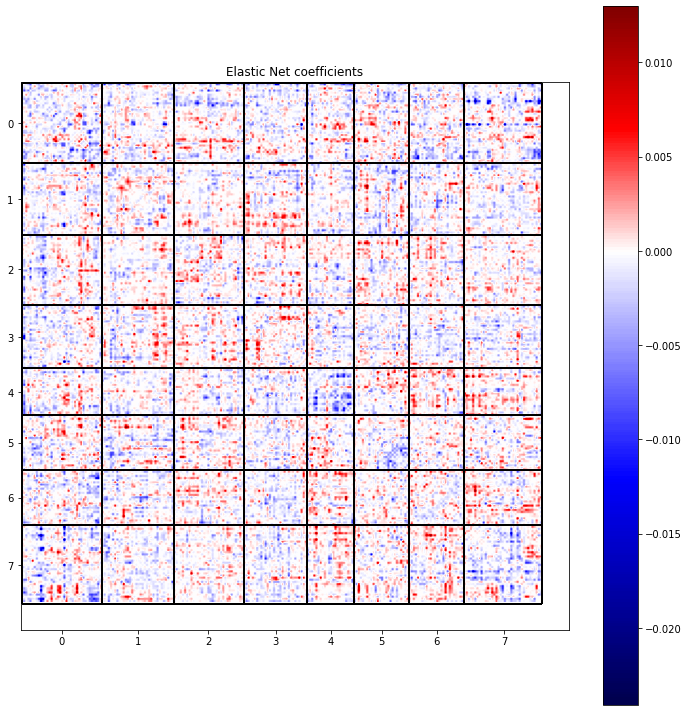

In [24]:
plot_coef_elastic_net(model)

# Grouped Feature Importance

In [25]:
from src.visualization.viz_utils import plot_grouped_FI
from src.visualization.group_imp import grouped_permutation_FI, group_only_permutation_FI
from src.preprocessing.colnames_to_yeo7 import get_colnames_df

In [26]:
groups_df = get_colnames_df()
groups_df = groups_df.loc[np.in1d(groups_df["conn_name"], Xtest.columns)] # remove entries of groups_df that are not in colnames of X

In [27]:
df_importance = grouped_permutation_FI(model, Xtest, ytest, groups_df, m = 100)

In [28]:
df_importance.head()

,region,mean decrease accuracy
0,4_6,0.003511
1,6_7,-0.003404
2,6_6,0.000319
3,3_6,-0.002447
4,2_6,-0.005638


/content/drive/MyDrive/Colab Notebooks/Innolab/Github/src/visualization/viz_utils.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance.iloc[:,1][df_importance.iloc[:,1] < 0] = 0


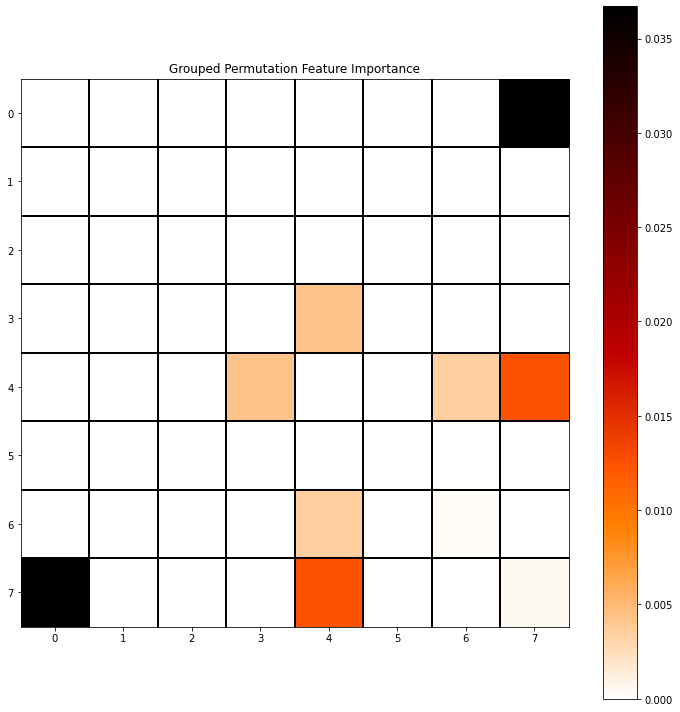

In [29]:
plot_grouped_FI(df_importance, title = "Grouped Permutation Feature Importance")

In [30]:
df_importance_only = group_only_permutation_FI(model, Xtest, ytest, groups_df, m = 100)

/content/drive/MyDrive/Colab Notebooks/Innolab/Github/src/visualization/viz_utils.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance.iloc[:,1][df_importance.iloc[:,1] < 0] = 0


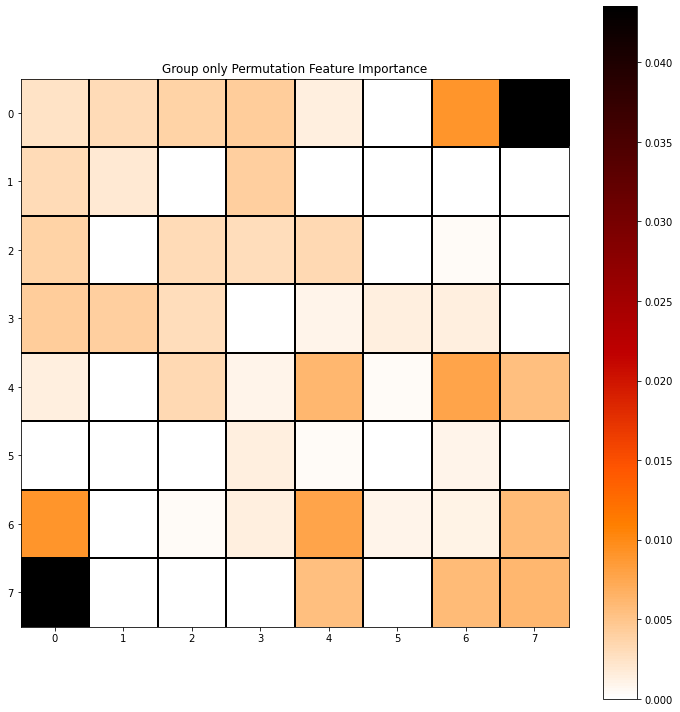

In [31]:
plot_grouped_FI(df_importance_only, title = "Group only Permutation Feature Importance")